In [1]:
import trimesh
import numpy as np
import os
import json

import plotly.graph_objs as go
import open3d as o3d

from eval_iou import BoundingCubeNormalization, plotly_mesh3d_to_trimesh, trimesh_to_plotly_mesh3d

os.chdir("/storage/user/huju/transferred/ws_dditnach/Diffusion-SDF")
from dataloader.dataset_ScanARCW import MyScanARCWDataset

label2id = {
        "sofa": "04256520",
        # "table": "04379243",
        # "bed": "02818832",
        # "bathtub": "02808440",
        # "chair": "03001627",
        # "cabinet": "02933112",
        # 'plane':'02691156',
        # 'bottle':'02876657',
    }

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
exp_dir = "config/ddit_stage2_diff_cond_sofa_train"
specs = json.load(open(os.path.join(exp_dir, "specs.json")))
print(specs["Description"])

dataset_train = MyScanARCWDataset(latent_path_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520",
                               pcd_path_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DATA",
                               json_file_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DATA/ScanARCW/json_files_v5",
                               sdf_file_root="/home/wiss/lhao/binghui_DONTDELETE_ME/DDIT/DATA/ScanARCW_new/ScanARCW/sdf_samples/04256520",
                               split_file=specs.get("TrainSplit",None),
                               pc_size=specs['diffusion_specs'].get('sample_pc_size', 128),
                               length=specs.get('dataset_length', -1),
                               times=specs.get('times', 1),
                               pre_load=False,
                               conditional=specs["diffusion_model_specs"].get("cond", True),
                               include_category=False,
                               use_neighbor=specs.get('use_neighbor', False),
                               preprocess="/storage/user/huju/transferred/ws_dditnach/DDIT/preprocess_output/experiment_1_class_alter_NptcUsdf_repro"
                               )

diffusion training (conditional) on sofa dataset 使用ddit版本编码器
all tmp_latent_paths:456
now using for training:364
initializing latent_paths and checking corresponding segmented pcd...


  0%|          | 0/364 [00:00<?, ?it/s]

scene0381_02
2
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_2/model_canonical.obj', 'gt_scale_c2w': [1.393733, 1.204592, 1.436368], 'gt_translation_c2w': [-0.756782, -2.663944, 1.26873], 'category_id': '04256520', 'cad_id': '1230d31e3a6cbf309cd431573238602d', 'category_name': 'sofa', 'scale_sdf2mesh': [0.6430880888014722], 'translation_sdf2mesh': [0.0034843349999999903, 0.00656502500000001, 0.032749190000000004], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_2.npz', 'gt_rotation_quat_wxyz_c2w': [0.9770607212884037, 0.0, -0.21296090466417603, 0.0]}
scene0381_02
3
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_3/model_canonical.obj', 'gt_scale_c2w': [1.333796, 1.207438, 1.493714], 'gt_translation_c2w': [0.147717, -2.663103, -0.968653], 'category_id': '04256520', 'cad_id': '1230d31e3a6cbf309cd431573238602d', 'cat

 33%|███▎      | 119/364 [00:01<00:01, 126.04it/s]

scene0432_01
4
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/4521ce028e5009811866a0bc19f46a1d_scene0432_01_ins_4/model_canonical.obj', 'gt_scale_c2w': [1.015357, 1.401886, 1.036007], 'gt_translation_c2w': [0.669774, -0.387368, 1.024775], 'category_id': '04256520', 'cad_id': '4521ce028e5009811866a0bc19f46a1d', 'category_name': 'sofa', 'scale_sdf2mesh': [0.5732109566153669], 'translation_sdf2mesh': [0.0, 0.024462910000000008, -0.051955749999999974], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/4521ce028e5009811866a0bc19f46a1d_scene0432_01_ins_4.npz', 'gt_rotation_quat_wxyz_c2w': [0.9996212681807447, 0.0, 0.027519451315743355, 0.0]}


 55%|█████▍    | 199/364 [00:01<00:00, 167.99it/s]

scene0381_02
4
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/7ae657b39aa2be68ccd1bcd57588acf8_scene0381_02_ins_4/model_canonical.obj', 'gt_scale_c2w': [1.486233, 2.218334, 1.806494], 'gt_translation_c2w': [0.428396, -2.669162, 1.295171], 'category_id': '04256520', 'cad_id': '7ae657b39aa2be68ccd1bcd57588acf8', 'category_name': 'sofa', 'scale_sdf2mesh': [0.8255174041389984], 'translation_sdf2mesh': [0.10284732499999993, 0.05091076500000004, 0.08517618999999998], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/7ae657b39aa2be68ccd1bcd57588acf8_scene0381_02_ins_4.npz', 'gt_rotation_quat_wxyz_c2w': [0.9763542956793265, 0.0, 0.21617652349070252, 0.0]}


 85%|████████▍ | 308/364 [00:02<00:00, 213.55it/s]

scene0381_00
5
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_5/model_canonical.obj', 'gt_scale_c2w': [0.628837, 1.571009, 2.014241], 'gt_translation_c2w': [0.453786, -2.024369, -1.359402], 'category_id': '04256520', 'cad_id': 'c1b8d982d97e337f19fb4103277a6b93', 'category_name': 'sofa', 'scale_sdf2mesh': [0.45044673229578547], 'translation_sdf2mesh': [-0.0016978600000000024, -0.07273771500000002, -0.002920649999999971], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_5.npz', 'gt_rotation_quat_wxyz_c2w': [0.9994293142937329, 0.0, 0.0337793684126691, 0.0]}
scene0381_00
6
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_6/model_canonical.obj', 'gt_scale_c2w': [0.641158, 1.557385, 1.969344], 'gt_translation_c2w': [-0.548681, -2.026825, -1.522597], 'category_id': '04256520', 'cad_id': 'c1b8d982d97e337f19fb4103277a6b93', 

100%|██████████| 364/364 [00:02<00:00, 147.83it/s]

=========latent indexing finished!


In [4]:
exp_dir = "config/ddit_stage2_diff_cond"
specs = json.load(open(os.path.join(exp_dir, "specs.json")))
print(specs["Description"])

dataset_train = MyScanARCWDataset(latent_path_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520",
                            pcd_path_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DATA",
                            json_file_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DATA/ScanARCW/json_files_v5",
                            sdf_file_root="/home/wiss/lhao/binghui_DONTDELETE_ME/DDIT/DATA/ScanARCW_new/ScanARCW/sdf_samples/04256520",
                            split_file=specs.get("TrainSplit",None),
                            pc_size=specs['diffusion_specs'].get('sample_pc_size', 128),
                            length=specs.get('dataset_length', -1),
                            times=specs.get('times', 1),
                            pre_load=False,
                            conditional=specs["diffusion_model_specs"].get("cond", True),
                            include_category=False,
                            use_neighbor=specs.get('use_neighbor', False),
                            preprocess="/storage/user/huju/transferred/ws_dditnach/DDIT/preprocess_output/experiment_1_class_alter_NptcUsdf_repro"
                            )

diffusion training (conditional) on sofa dataset 很快收敛到0.044 使用ddit版本编码器
all tmp_latent_paths:456
now using for training:456
initializing latent_paths and checking corresponding segmented pcd...


  0%|          | 0/456 [00:00<?, ?it/s]

scene0381_02
2
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_2/model_canonical.obj', 'gt_scale_c2w': [1.393733, 1.204592, 1.436368], 'gt_translation_c2w': [-0.756782, -2.663944, 1.26873], 'category_id': '04256520', 'cad_id': '1230d31e3a6cbf309cd431573238602d', 'category_name': 'sofa', 'scale_sdf2mesh': [0.6430880888014722], 'translation_sdf2mesh': [0.0034843349999999903, 0.00656502500000001, 0.032749190000000004], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_2.npz', 'gt_rotation_quat_wxyz_c2w': [0.9770607212884037, 0.0, -0.21296090466417603, 0.0]}
scene0381_02
3
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_3/model_canonical.obj', 'gt_scale_c2w': [1.333796, 1.207438, 1.493714], 'gt_translation_c2w': [0.147717, -2.663103, -0.968653], 'category_id': '04256520', 'cad_id': '1230d31e3a6cbf309cd431573238602d', 'cat

 31%|███▏      | 143/456 [00:00<00:00, 1406.23it/s]

scene0381_02
4
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/7ae657b39aa2be68ccd1bcd57588acf8_scene0381_02_ins_4/model_canonical.obj', 'gt_scale_c2w': [1.486233, 2.218334, 1.806494], 'gt_translation_c2w': [0.428396, -2.669162, 1.295171], 'category_id': '04256520', 'cad_id': '7ae657b39aa2be68ccd1bcd57588acf8', 'category_name': 'sofa', 'scale_sdf2mesh': [0.8255174041389984], 'translation_sdf2mesh': [0.10284732499999993, 0.05091076500000004, 0.08517618999999998], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/7ae657b39aa2be68ccd1bcd57588acf8_scene0381_02_ins_4.npz', 'gt_rotation_quat_wxyz_c2w': [0.9763542956793265, 0.0, 0.21617652349070252, 0.0]}


 75%|███████▌  | 344/456 [00:00<00:00, 1724.94it/s]

scene0381_00
5
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_5/model_canonical.obj', 'gt_scale_c2w': [0.628837, 1.571009, 2.014241], 'gt_translation_c2w': [0.453786, -2.024369, -1.359402], 'category_id': '04256520', 'cad_id': 'c1b8d982d97e337f19fb4103277a6b93', 'category_name': 'sofa', 'scale_sdf2mesh': [0.45044673229578547], 'translation_sdf2mesh': [-0.0016978600000000024, -0.07273771500000002, -0.002920649999999971], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_5.npz', 'gt_rotation_quat_wxyz_c2w': [0.9994293142937329, 0.0, 0.0337793684126691, 0.0]}
scene0381_00
6
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_6/model_canonical.obj', 'gt_scale_c2w': [0.641158, 1.557385, 1.969344], 'gt_translation_c2w': [-0.548681, -2.026825, -1.522597], 'category_id': '04256520', 'cad_id': 'c1b8d982d97e337f19fb4103277a6b93', 

100%|██████████| 456/456 [00:00<00:00, 1505.90it/s]

=========latent indexing finished!


In [5]:
json_version = "json_files_v6"
data_root = "/storage/user/huju/transferred/ws_dditnach/DATA"

label="sofa"

mesh_pred_path = "/storage/user/huju/transferred/ws_dditnach/Diffusion-SDF/config/ddit_stage2_diff_cond/recon/23999/Meshes/1a4a8592046253ab5ff61a3a2a0e2484_scene0484_00_ins_1.ply.ply"
mesh_pred = trimesh.load(mesh_pred_path)

scene_name, ins_id, obj_id = dataset_train.get_info_from_latent_name(os.path.basename(mesh_pred_path).split(".")[0])
json_file = os.path.join(data_root,"ScanARCW",json_version,"{}.json".format(scene_name))

mesh_gt_root = "/storage/user/huju/transferred/ws_dditnach/DATA/ScanARCW/canonical_mesh_manifoldplus"
mesh_gt_path = os.path.join(mesh_gt_root, label2id[label], os.path.basename(mesh_pred_path).split(".")[0],"model_canonical_manifoldplus.obj")
mesh_gt = trimesh.load(mesh_gt_path)
mesh_gt, scale, translation = BoundingCubeNormalization(mesh_gt)
mesh_gt = plotly_mesh3d_to_trimesh(mesh_gt)

In [ ]:
vis_data = [trimesh_to_plotly_mesh3d(mesh_pred),trimesh_to_plotly_mesh3d(mesh_gt)]

layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

fig = go.Figure()
fig = go.Figure(data=vis_data, layout=layout)
fig.show()

In [10]:
# def compute_pcr(mesh_pred, mesh_gt, threshold=0.047):
points_pred = mesh_pred.vertices
closest, distance, _ = trimesh.proximity.closest_point(mesh_gt, points_pred)

/usr/wiss/lhao/anaconda3/envs/hjp_diffusionsdf/lib/python3.9/site-packages/trimesh/triangles.py:643: RuntimeWarning:

invalid value encountered in divide



最近点: [[-0.77864721  0.62171356  0.0825739 ]
 [-0.47840476 -0.44782567 -0.75412534]
 [ 0.60563335 -0.31442157 -0.72735833]
 [-0.05253373  0.26957938 -0.9584039 ]
 [ 0.66003026 -0.31157456 -0.67922866]
 [ 0.38557578  0.54626602  0.73991613]
 [-0.44326568  0.8578886   0.25669239]
 [ 0.84139028  0.11665244  0.52252864]
 [ 0.16062204  0.69378048  0.70204644]
 [-0.05802061 -0.92800256  0.36028401]]
距离: [0.62871911 1.37380382 0.15413948 0.83618741 0.30198022 0.07359832
 0.9459802  0.94674545 1.45098705 1.11985566]
三角形索引: [ 270 1147  871  541  871  344   14  362   89  767]


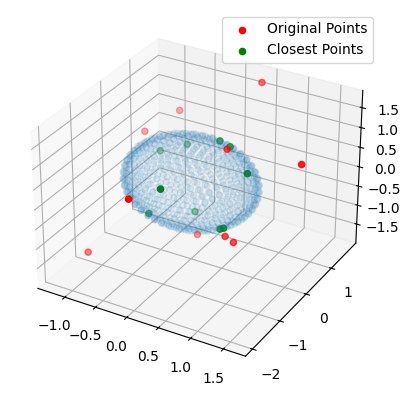

In [2]:
import trimesh
import numpy as np

# 创建或加载一个网格
# 这里我们使用一个内置的示例网格
mesh = trimesh.primitives.Sphere(radius=1.0)

# 定义一些外部点
# 这里我们随机生成一些点，位于原点周围的立方体内
points = np.random.random((10, 3)) * 4 - 2  # 生成10个点，范围在-2到2之间

# 使用trimesh.proximity.closest_point找到这些点到网格的最近点
closest_points, distances, triangle_indices = trimesh.proximity.closest_point(mesh, points)

# 打印结果
print("最近点:", closest_points)
print("距离:", distances)
print("三角形索引:", triangle_indices)

# 可选：可视化结果
# 为了可视化，我们将使用matplotlib绘制原始点和最近点
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制网格的顶点
ax.scatter(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2], alpha=0.1)

# 绘制原始点
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='r', label='Original Points')

# 绘制最近点
ax.scatter(closest_points[:, 0], closest_points[:, 1], closest_points[:, 2], color='g', label='Closest Points')

ax.legend()
plt.show()


In [4]:
points

array([[-1.2362942 ,  1.04890271,  0.14050823],
       [-1.21845219, -1.0253057 , -1.75721236],
       [ 0.70452262, -0.36007924, -0.83642376],
       [-0.1232295 ,  0.51299098, -1.75524911],
       [ 0.8537678 , -0.40102415, -0.89290269],
       [ 0.35464919,  0.50783156,  0.68529882],
       [-0.92072823,  1.64214138,  0.48441071],
       [ 1.62559614,  0.21323176,  1.04408453],
       [ 0.37465296,  1.74655496,  1.67735156],
       [-0.06289262, -1.97513125,  0.75724052]])